***Main goal is thersold value only***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Position_Salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
x=dataset.iloc[:,1:2].values
y=dataset.iloc[:,[2]].values

In [5]:
# for svm features scaling is required  
from sklearn.preprocessing import StandardScaler

In [6]:
sc_x=StandardScaler()

In [7]:
sc_y=StandardScaler()

In [8]:
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

C:\Users\Shoban_Ash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
x,y

(array([[-1.5666989 ],
        [-1.21854359],
        [-0.87038828],
        [-0.52223297],
        [-0.17407766],
        [ 0.17407766],
        [ 0.52223297],
        [ 0.87038828],
        [ 1.21854359],
        [ 1.5666989 ]]), array([[-0.72004253],
        [-0.70243757],
        [-0.66722767],
        [-0.59680786],
        [-0.49117815],
        [-0.35033854],
        [-0.17428902],
        [ 0.17781001],
        [ 0.88200808],
        [ 2.64250325]]))

In [10]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(x,y)

C:\Users\Shoban_Ash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
y_pred=regressor.predict(sc_x.transform(np.array([[6.5]])))
y_pred=sc_y.inverse_transform(y_pred)

In [12]:
y_pred

array([170370.0204065])

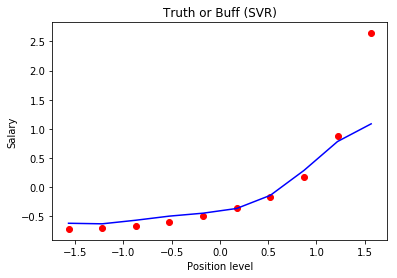

In [13]:
plt.scatter(x,y,color='red')
plt.plot(x,regressor.predict(x),color='blue')
plt.title('Truth or Buff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()